# Question 4

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [32]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)
image_copy = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [30]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          image: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """
    img_noisy = img.copy()
    salt_pepper_ratio = 0.25 # This means 2% of the pixels will be affected
    amount = salt_pepper_ratio * img_noisy.size  # Total number of affected pixels
    # Calculate the number of salt and pepper pixels
    num_salt = np.ceil(amount * 0.5).astype(int)
    num_pepper = np.ceil(amount * 0.5).astype(int)
    # Add Salt noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    img_noisy[coords[0], coords[1]] = 255
    # Add Pepper noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    img_noisy[coords[0], coords[1]] = 0
    return img_noisy
    # return img

(-0.5, 374.5, 499.5, -0.5)

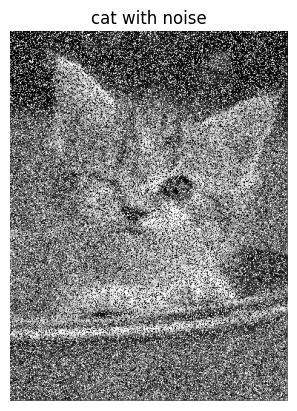

In [31]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

(-0.5, 374.5, 499.5, -0.5)

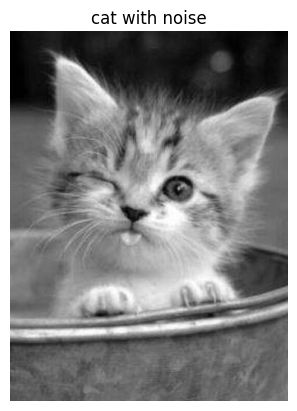

In [33]:
image = Add_Noise(image)
plt.imshow(image_copy,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [7]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  #######################
  #    your code here   #

  top_pad = filter_size // 2
  bottom_pad = filter_size - top_pad
  left_pad = filter_size // 2
  right_pad = filter_size - left_pad

  # Vertical padding
  top = img[:top_pad][::-1]
  bottom = img[-bottom_pad:][::-1]
  v_padded = np.vstack((top, img, bottom))

  # Horizontal padding
  left = v_padded[:, :left_pad][:, ::-1]
  right = v_padded[:, -right_pad:][:, ::-1]
  padded_img = np.hstack((left, v_padded, right))

  return padded_img

  #######################

  # return image

In [17]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  #######################
  #    your code here   #
  for i in range(result.shape[0]):
      for j in range(result.shape[1]):
          neighborhood = image[i:i+filter_size, j: j+filter_size]
          result[i, j] = np.sum(neighborhood) / (filter_size * filter_size)
  #######################
  return result

In [19]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #
  for i in range(result.shape[0]):
      for j in range(result.shape[1]):
          neighborhood = image[i:i+filter_size, j:j+filter_size]
          result[i, j] = np.median(neighborhood)
  #######################
  return result

In [23]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    image = Reflect101(img, filter_size)
    result = np.zeros(img.shape)
    kernel_center = (filter_size // 2,  filter_size // 2)
    for i in range(filter_size):
        for j in range(filter_size):
          distance = (i - kernel_center[0])**2 + (j - kernel_center[1])**2
          kernel[i, j] = np.exp(-distance / (2 * std**2))
    kernel /= np.sum(kernel)
    for i in range(filter_size):
        for j in range(filter_size):
            neighborhood = image[i:i+filter_size, j:j + filter_size]
            result[i, j] = np.sum(neighborhood * kernel[:neighborhood.shape[0], :neighborhood.shape[1]])
    #######################
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

(-0.5, 374.5, 499.5, -0.5)

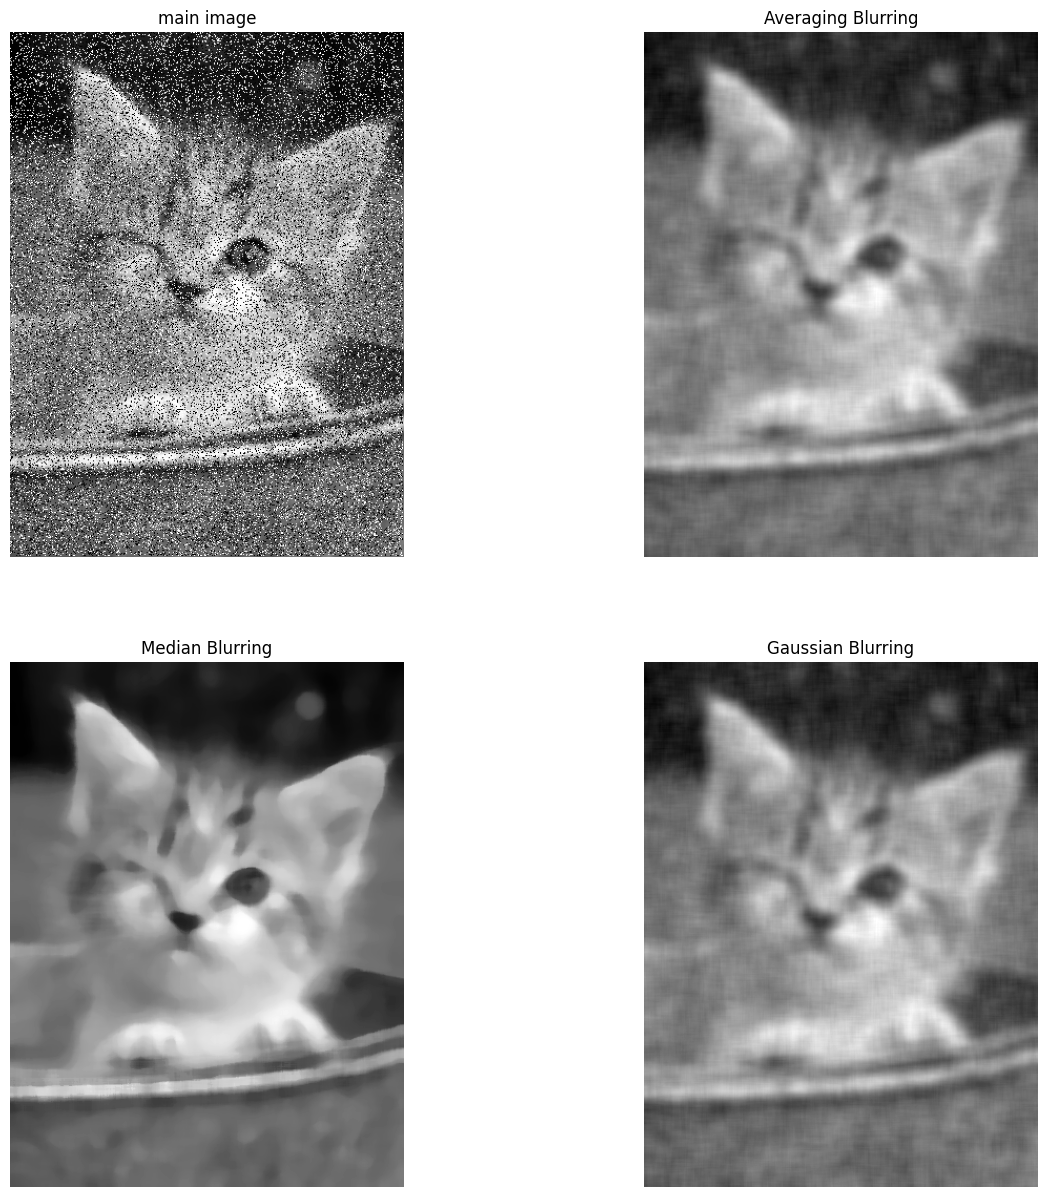

In [24]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


(-0.5, 374.5, 499.5, -0.5)

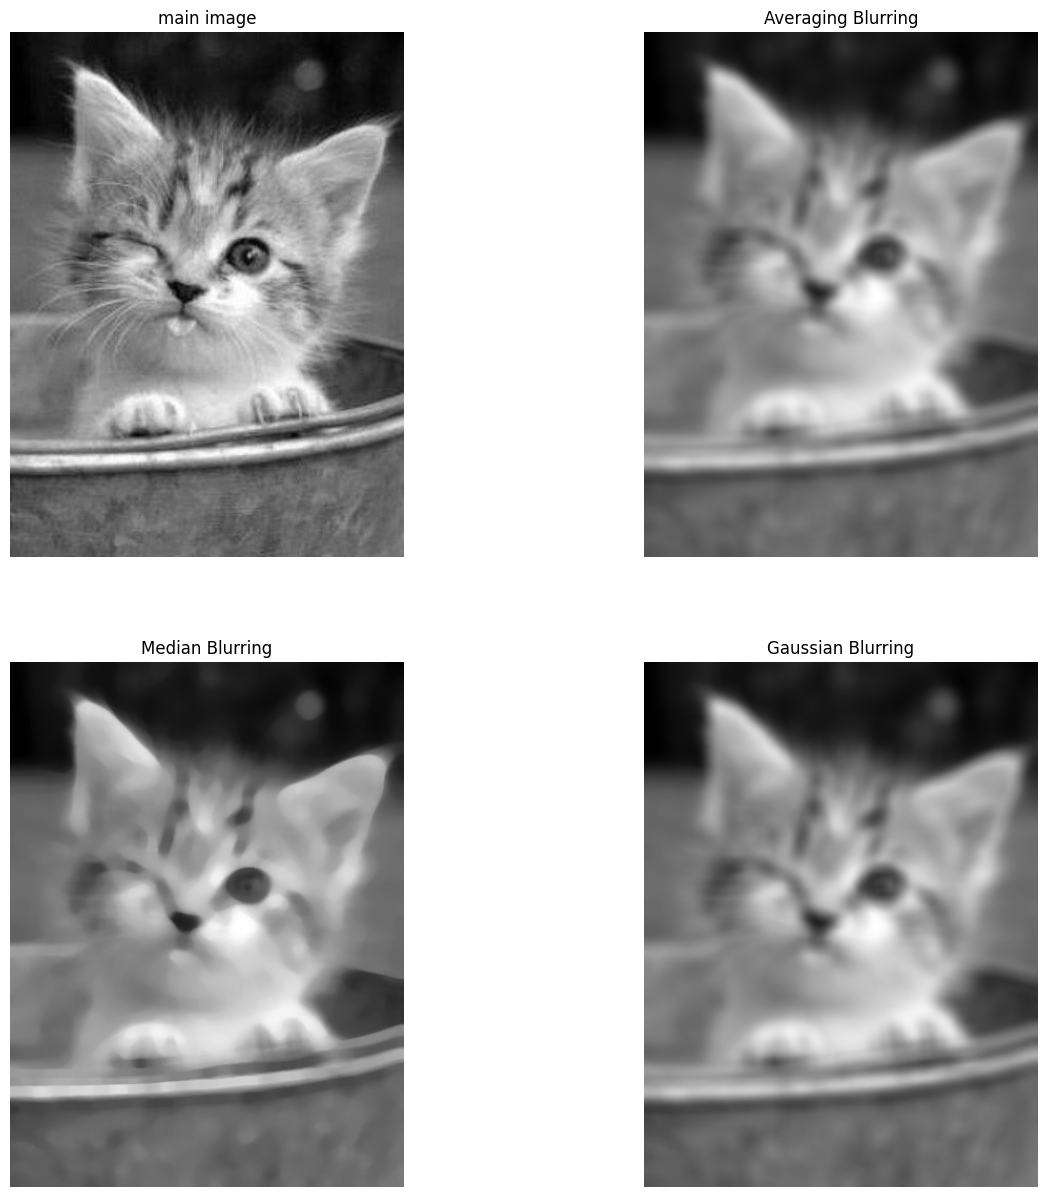

In [34]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image_copy,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image_copy,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image_copy,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image_copy,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [25]:
AveragingBlurring = cv2.blur(image, (15, 15))## your code here ##
MedianBlurring = cv2.medianBlur(image, 15)## your code here ##
GaussianBlurring = cv2.GaussianBlur(image, (15, 15), 40)## your code here ##

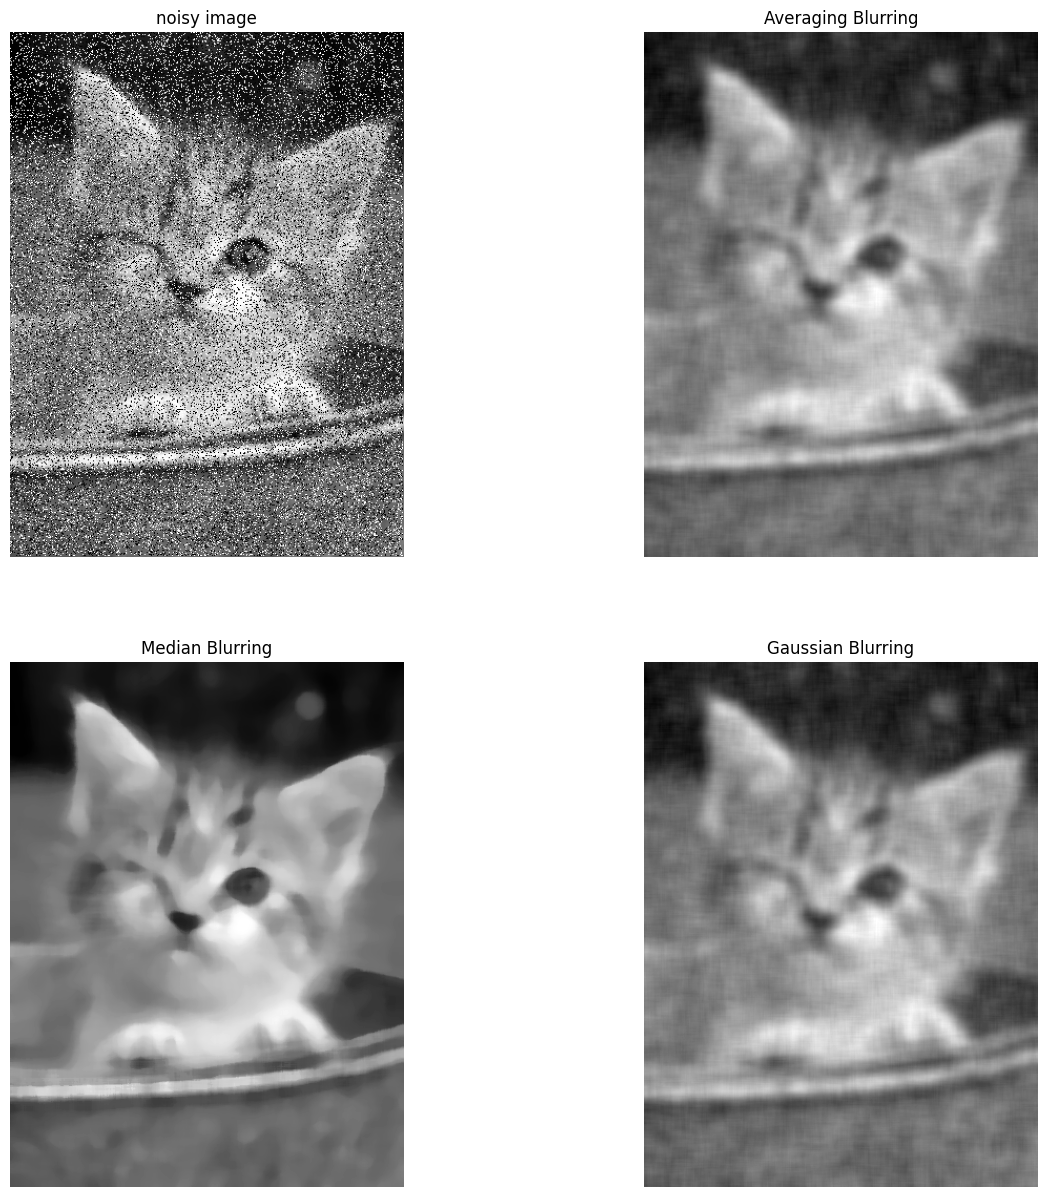

In [26]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")

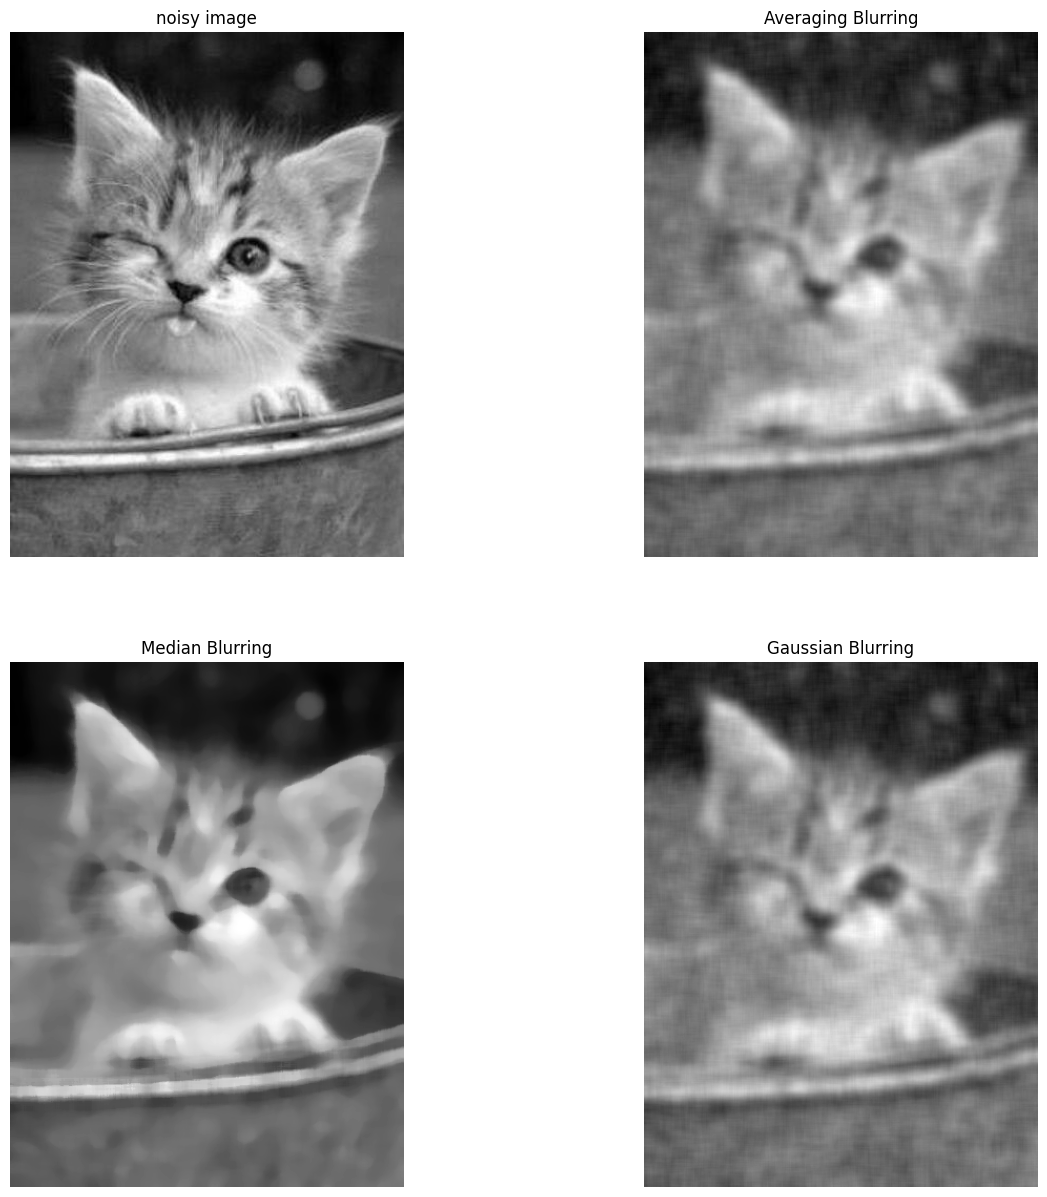

In [35]:
# Do not change this cell
Array = [image_copy, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")